In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, f1_score, precision_score, roc_curve, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats
from sklearn import ensemble

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('final_minn.csv')
df.head()

,Unnamed: 0,posteam,home_team,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
0,943,MIN,MIN,0.50,0.50,75.0,3,3,900.0,1800.0,3600.0,1,1.0,0.0,10,pass,0.0,1,0
1,944,MIN,MIN,0.54,0.46,66.0,3,3,861.0,1761.0,3561.0,1,2.0,0.0,1,run,0.0,0,0
2,945,MIN,MIN,0.54,0.46,64.0,3,3,822.0,1722.0,3522.0,1,1.0,0.0,10,pass,0.0,0,0
3,946,MIN,MIN,0.57,0.43,52.0,3,3,787.0,1687.0,3487.0,1,1.0,0.0,10,run,0.0,0,0
4,947,MIN,MIN,0.55,0.45,51.0,3,3,750.0,1650.0,3450.0,1,2.0,0.0,9,run,0.0,1,0


In [3]:
df.set_index('Unnamed: 0', inplace=True)

In [4]:
df.head()

,posteam,home_team,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
Unnamed: 0,,,,,,,,,,,,,,,,,,
943,MIN,MIN,0.50,0.50,75.0,3,3,900.0,1800.0,3600.0,1,1.0,0.0,10,pass,0.0,1,0
944,MIN,MIN,0.54,0.46,66.0,3,3,861.0,1761.0,3561.0,1,2.0,0.0,1,run,0.0,0,0
945,MIN,MIN,0.54,0.46,64.0,3,3,822.0,1722.0,3522.0,1,1.0,0.0,10,pass,0.0,0,0
946,MIN,MIN,0.57,0.43,52.0,3,3,787.0,1687.0,3487.0,1,1.0,0.0,10,run,0.0,0,0
947,MIN,MIN,0.55,0.45,51.0,3,3,750.0,1650.0,3450.0,1,2.0,0.0,9,run,0.0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 943 to 44275
Data columns (total 18 columns):
posteam                      996 non-null object
home_team                    996 non-null object
home_wp                      996 non-null float64
away_wp                      996 non-null float64
yardline_100                 996 non-null float64
home_timeouts_remaining      996 non-null int64
away_timeouts_remaining      996 non-null int64
quarter_seconds_remaining    996 non-null float64
half_seconds_remaining       996 non-null float64
game_seconds_remaining       996 non-null float64
qtr                          996 non-null int64
down                         996 non-null float64
goal_to_go                   996 non-null float64
ydstogo                      996 non-null int64
play_type                    996 non-null object
score_differential           996 non-null float64
shotgun                      996 non-null int64
no_huddle                    996 non-null int64
dtypes

In [6]:
df.describe()

,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,0.542952,0.457048,52.161647,2.508032,2.556225,417.201807,822.021084,1693.105422,2.595382,1.808233,0.046185,8.530120,-2.003012,0.607430,0.068273
std,0.295584,0.295584,23.801292,0.805094,0.794359,268.666737,555.607899,1069.102136,1.146521,0.848512,0.209990,3.936952,10.265373,0.488568,0.252341
min,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-27.000000,0.000000,0.000000
25%,0.320000,0.200000,33.000000,2.000000,2.000000,173.000000,322.250000,727.500000,2.000000,1.000000,0.000000,6.000000,-9.000000,0.000000,0.000000
50%,0.570000,0.430000,57.000000,3.000000,3.000000,401.000000,808.000000,1753.000000,3.000000,2.000000,0.000000,10.000000,0.000000,1.000000,0.000000
75%,0.800000,0.680000,72.000000,3.000000,3.000000,639.250000,1303.000000,2581.000000,4.000000,2.000000,0.000000,10.000000,5.000000,1.000000,0.000000
max,1.000000,1.000000,99.000000,3.000000,3.000000,900.000000,1800.000000,3600.000000,5.000000,4.000000,1.000000,25.000000,25.000000,1.000000,1.000000


In [7]:
df.head()

,posteam,home_team,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
Unnamed: 0,,,,,,,,,,,,,,,,,,
943,MIN,MIN,0.50,0.50,75.0,3,3,900.0,1800.0,3600.0,1,1.0,0.0,10,pass,0.0,1,0
944,MIN,MIN,0.54,0.46,66.0,3,3,861.0,1761.0,3561.0,1,2.0,0.0,1,run,0.0,0,0
945,MIN,MIN,0.54,0.46,64.0,3,3,822.0,1722.0,3522.0,1,1.0,0.0,10,pass,0.0,0,0
946,MIN,MIN,0.57,0.43,52.0,3,3,787.0,1687.0,3487.0,1,1.0,0.0,10,run,0.0,0,0
947,MIN,MIN,0.55,0.45,51.0,3,3,750.0,1650.0,3450.0,1,2.0,0.0,9,run,0.0,1,0


In [8]:
df.tail()

,posteam,home_team,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,play_type,score_differential,shotgun,no_huddle
Unnamed: 0,,,,,,,,,,,,,,,,,,
44270,MIN,MIN,0.02,0.98,52.0,0,0,118.0,118.0,118.0,4,1.0,0.0,5,pass,-14.0,1,0
44272,MIN,MIN,0.01,0.99,29.0,0,0,89.0,89.0,89.0,4,1.0,0.0,5,pass,-14.0,1,0
44273,MIN,MIN,0.01,0.99,39.0,0,0,62.0,62.0,62.0,4,2.0,0.0,15,pass,-14.0,1,1
44274,MIN,MIN,0.01,0.99,35.0,0,0,42.0,42.0,42.0,4,3.0,0.0,11,pass,-14.0,1,1
44275,MIN,MIN,0.05,0.95,28.0,0,0,24.0,24.0,24.0,4,4.0,0.0,4,pass,-14.0,1,1


# /////////////

In [9]:
# home = df.groupby(['home_team'])['home_wp', 'away_wp', 'home_timeouts_remaining', 'away_timeouts_remaining']
# home = list(home)
# minn_df = home[4][1]

In [10]:
# minn_df2 = minn_df[['home_wp', 'home_timeouts_remaining']]

In [11]:
# minn_df2

In [12]:
# home2 = list(home)

In [13]:
# home_det = home2[0:3][1][1]
# home_det = home_det[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_det.head()

In [14]:
# home_chi = home2[0][1]
# home_chi = home_chi[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_chi.head()

In [15]:
# home_gb = home2[2][1]
# home_gb = home_gb[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_gb.head()

In [16]:
# home_la = home2[3][1]
# home_la = home_la[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_la.head()

In [17]:
# home_ne = home2[5][1]
# home_ne = home_ne[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_ne.head()

In [18]:
# home_nyj = home2[6][1]
# home_nyj = home_nyj[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_nyj.head()

In [19]:
# home_phi = home2[7][1]
# home_phi = home_phi[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_phi.head()

In [20]:
# home_sea = home2[8][1]
# home_sea = home_sea[['home_team', 'away_wp', 'away_timeouts_remaining']]
# home_sea.head()

In [96]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.02)

gbr.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [97]:
prediction = gbr.predict(X_test)

accuracy = accuracy_score(y_test, y_hat_test)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 75.59%


In [98]:
features = final_df.columns
features

Index(['home_wp', 'away_wp', 'yardline_100', 'home_timeouts_remaining',
       'away_timeouts_remaining', 'quarter_seconds_remaining',
       'half_seconds_remaining', 'game_seconds_remaining', 'qtr', 'down',
       'goal_to_go', 'ydstogo', 'score_differential', 'shotgun', 'no_huddle',
       'play_type'],
      dtype='object')

In [99]:
feature_importance = gbr.feature_importances_.tolist()

In [100]:
final_df.shotgun.value_counts()

 0.803916    605
-1.243911    391
Name: shotgun, dtype: int64

In [101]:
from sklearn.model_selection import GridSearchCV
classifier = RandomForestClassifier(n_estimators=300, random_state=42)

In [102]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [103]:
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [104]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'boots

In [105]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 800}


In [106]:
best_result = gd_sr.best_score_
print(best_result)

0.7317073170731707


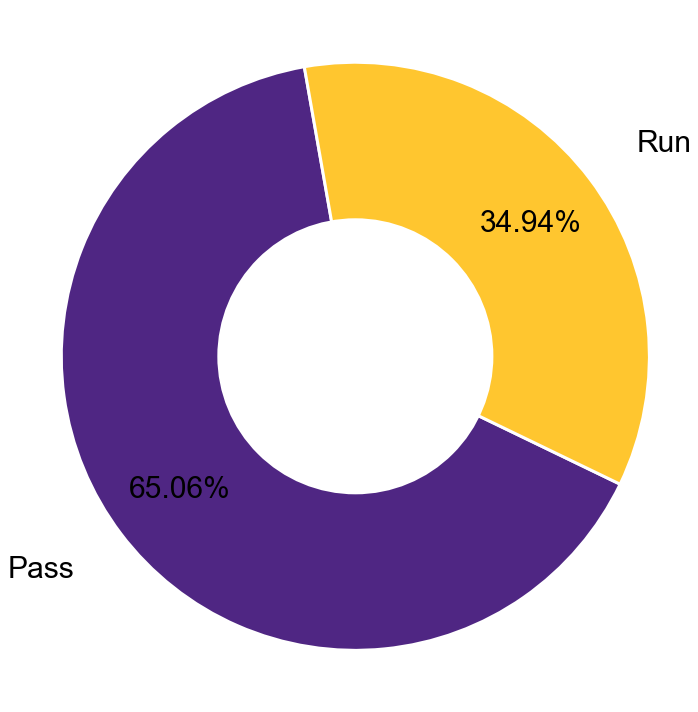

In [107]:
plt.figure(figsize=(10,10))
plt.pie(df['play_type'].value_counts(), labels=['Pass', 'Run'], colors=['#4F2683', '#FFC62F'], autopct='%.2f%%', textprops={'fontsize': 30}, wedgeprops={'linewidth': 3}, labeldistance=1.2, pctdistance=.75, radius=1.4, startangle=100)
centre_circle = plt.Circle((0,0),0.65,color='white', fc='white',linewidth=3)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rcParams['text.color'] = 'white'
plt.axis('equal')
plt.tight_layout()
plt.show()

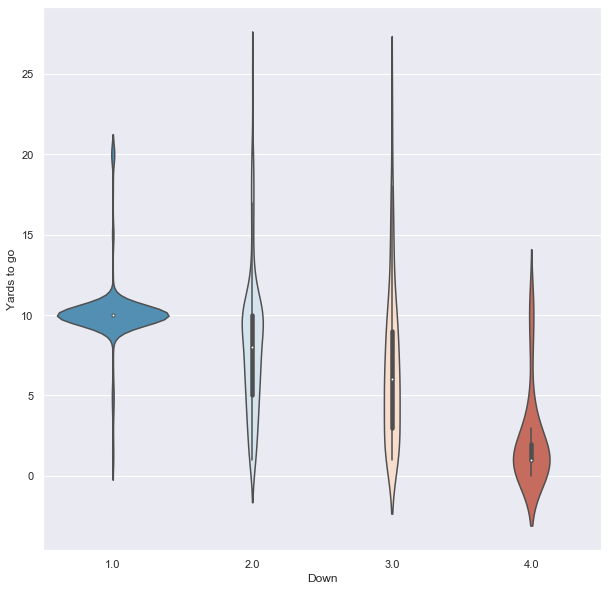

In [32]:
plt.figure(figsize=(10,10))
sns.violinplot(data=df, x="down", y='ydstogo', palette='RdBu_r', alpha=.5);
plt.xlabel('Down')
plt.ylabel('Yards to go');

<Figure size 720x720 with 0 Axes>

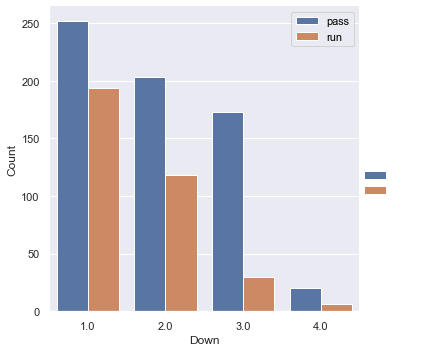

In [33]:
plt.figure(figsize=(10,10))
sns.catplot(x="down", kind="count", hue='play_type', data=df);
plt.ylabel('Count')
plt.xlabel('Down')
plt.rcParams['text.color'] = 'black'
plt.legend()

In [34]:
df_num = df.select_dtypes(exclude='object')
df_cat = df.select_dtypes(include='object')

In [35]:
df_num.head()

,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle
Unnamed: 0,,,,,,,,,,,,,,,
943,0.50,0.50,75.0,3,3,900.0,1800.0,3600.0,1,1.0,0.0,10,0.0,1,0
944,0.54,0.46,66.0,3,3,861.0,1761.0,3561.0,1,2.0,0.0,1,0.0,0,0
945,0.54,0.46,64.0,3,3,822.0,1722.0,3522.0,1,1.0,0.0,10,0.0,0,0
946,0.57,0.43,52.0,3,3,787.0,1687.0,3487.0,1,1.0,0.0,10,0.0,0,0
947,0.55,0.45,51.0,3,3,750.0,1650.0,3450.0,1,2.0,0.0,9,0.0,1,0


In [36]:
df_cat.head()

,posteam,home_team,play_type
Unnamed: 0,,,
943,MIN,MIN,pass
944,MIN,MIN,run
945,MIN,MIN,pass
946,MIN,MIN,run
947,MIN,MIN,run


In [37]:
ss = StandardScaler()
num_scaled = pd.DataFrame(ss.fit_transform(df_num), columns=df_num.columns)

In [38]:
num_scaled.head()

,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle
0,-0.145385,0.145385,0.960025,0.611376,0.558939,1.797918,1.761081,1.784537,-1.392196,-0.953008,-0.220048,0.373542,0.195221,0.803916,-0.270695
1,-0.009991,0.009991,0.581704,0.611376,0.558939,1.652684,1.690852,1.748040,-1.392196,0.226118,-0.220048,-1.913638,0.195221,-1.243911,-0.270695
2,-0.009991,0.009991,0.497633,0.611376,0.558939,1.507450,1.620623,1.711542,-1.392196,-0.953008,-0.220048,0.373542,0.195221,-1.243911,-0.270695
3,0.091554,-0.091554,-0.006795,0.611376,0.558939,1.377111,1.557597,1.678788,-1.392196,-0.953008,-0.220048,0.373542,0.195221,-1.243911,-0.270695
4,0.023857,-0.023857,-0.048831,0.611376,0.558939,1.239325,1.490970,1.644162,-1.392196,0.226118,-0.220048,0.119411,0.195221,0.803916,-0.270695


In [39]:
num_scaled.set_index(df_num.index, inplace=True)

In [40]:
df_cat['play_type'].replace('pass', 1, inplace=True)
df_cat['play_type'].replace('run', 0, inplace=True)

In [41]:
df_cat.head()

,posteam,home_team,play_type
Unnamed: 0,,,
943,MIN,MIN,1
944,MIN,MIN,0
945,MIN,MIN,1
946,MIN,MIN,0
947,MIN,MIN,0


In [42]:
df_cat2 = df_cat.drop(columns=['posteam', 'home_team'])
df_cat2.head()

,play_type
Unnamed: 0,
943,1
944,0
945,1
946,0
947,0


In [43]:
final_df = pd.concat([num_scaled, df_cat2], axis=1)
final_df.shape

(996, 16)

In [44]:
final_df.head()

,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle,play_type
Unnamed: 0,,,,,,,,,,,,,,,,
943,-0.145385,0.145385,0.960025,0.611376,0.558939,1.797918,1.761081,1.784537,-1.392196,-0.953008,-0.220048,0.373542,0.195221,0.803916,-0.270695,1
944,-0.009991,0.009991,0.581704,0.611376,0.558939,1.652684,1.690852,1.748040,-1.392196,0.226118,-0.220048,-1.913638,0.195221,-1.243911,-0.270695,0
945,-0.009991,0.009991,0.497633,0.611376,0.558939,1.507450,1.620623,1.711542,-1.392196,-0.953008,-0.220048,0.373542,0.195221,-1.243911,-0.270695,1
946,0.091554,-0.091554,-0.006795,0.611376,0.558939,1.377111,1.557597,1.678788,-1.392196,-0.953008,-0.220048,0.373542,0.195221,-1.243911,-0.270695,0
947,0.023857,-0.023857,-0.048831,0.611376,0.558939,1.239325,1.490970,1.644162,-1.392196,0.226118,-0.220048,0.119411,0.195221,0.803916,-0.270695,0


In [45]:
final_df['shotgun'].value_counts()

 0.803916    605
-1.243911    391
Name: shotgun, dtype: int64

# TESTING

In [46]:
X = final_df.drop(columns='play_type')
y = final_df['play_type']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

In [48]:
print(X_train.shape)
X_train.head()

(697, 15)


,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle
Unnamed: 0,,,,,,,,,,,,,,,
30835,-0.382323,0.382323,1.170203,-0.631339,0.558939,0.609977,1.186646,1.486006,-1.392196,1.405244,-0.220048,1.390067,0.195221,0.803916,-0.270695
40404,-1.194682,1.194682,-1.646185,0.611376,0.558939,0.889273,1.321701,-0.128308,0.353087,-0.953008,-0.220048,0.373542,0.682540,-1.243911,-0.270695
40425,-1.296227,1.296227,-0.301044,0.611376,0.558939,-1.002495,0.406928,-0.603712,0.353087,0.226118,-0.220048,1.135936,0.974932,0.803916,-0.270695
15101,0.362340,-0.362340,0.960025,0.611376,0.558939,1.797918,1.761081,0.100036,0.353087,-0.953008,-0.220048,0.373542,0.585076,-1.243911,-0.270695
40456,-1.770104,1.770104,-1.772292,0.611376,0.558939,-0.432730,-0.938221,-1.302780,1.225729,1.405244,4.544466,0.373542,1.657178,-1.243911,-0.270695


In [49]:
print(X_test.shape)
X_test.head()

(299, 15)


,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle
Unnamed: 0,,,,,,,,,,,,,,,
38463,0.903913,-0.903913,-0.048831,0.611376,0.558939,0.390264,1.080403,1.430792,-1.392196,0.226118,-0.220048,-1.913638,0.877468,-1.243911,-0.270695
44208,-1.296227,1.296227,1.422417,0.611376,0.558939,0.416331,1.093008,-0.247159,0.353087,0.226118,-0.220048,-1.151245,-0.779417,-1.243911,-0.270695
4476,0.260795,-0.260795,-0.721401,-0.631339,0.558939,-1.121661,-1.271357,0.208592,-0.519555,0.226118,-0.220048,0.373542,-0.389562,-1.243911,-0.270695
28214,-0.179233,0.179233,-0.595294,-0.631339,0.558939,-0.551897,0.624817,1.194026,-1.392196,0.226118,-0.220048,0.373542,-0.097170,0.803916,-0.270695
17525,-1.465469,1.465469,-1.730256,0.611376,0.558939,-0.082678,0.851710,-0.372561,0.353087,1.405244,4.544466,0.627673,1.169859,0.803916,-0.270695


In [50]:
print(y_train.shape)
y_train.head()

(697,)


Unnamed: 0
30835    1
40404    0
40425    1
15101    0
40456    0
Name: play_type, dtype: int64

In [51]:
print(y_test.shape)
y_test.head()

(299,)


Unnamed: 0
38463    0
44208    0
4476     0
28214    0
17525    1
Name: play_type, dtype: int64

# LOGISTIC REGRESSION

In [52]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_hat_test = lr.predict(X_test)
y_hat_prob = lr.predict_proba(X_test)

In [53]:
print('Accuracy Score:', accuracy_score(y_test, y_hat_test))
print('Recall Score:', recall_score(y_test, y_hat_test))
print('Precision Score:', precision_score(y_test, y_hat_test))
print('F1 Score:', f1_score(y_test, y_hat_test))

Accuracy Score: 0.7558528428093646
Recall Score: 0.8038277511961722
Precision Score: 0.84
F1 Score: 0.8215158924205378


In [54]:
# run = 0, pass = 1
# prediction of run, then pass
# y_hat_prob

In [55]:
roc_auc_score(y_test, y_hat_prob[:,1])

0.7914938862307285

# KNN 

In [56]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

# also want actual probiblities
preds_probability = knn.predict_proba(X_test)

accuracy_score(y_test, preds)

0.6789297658862876

In [57]:
k_acc = {}
k_prec = {}
k_recall = {}

for k in range(2,15): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)

    preds_probability = knn.predict_proba(X_test)

    accuracy = accuracy_score(y_test, preds)
    k_acc[k] = accuracy
    
    precision = precision_score(y_test, preds)
    k_prec[k] = precision
    
    recall = recall_score(y_test, preds)
    k_recall[k] = recall

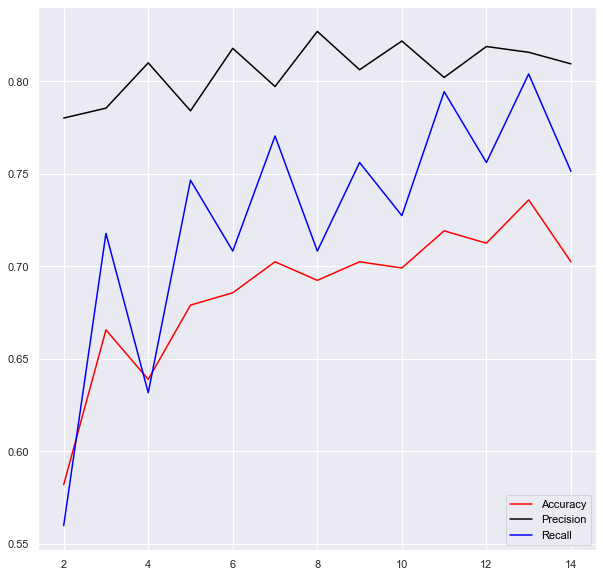

In [58]:
plt.figure(figsize=(10,10))
plt.plot(list(k_acc.keys()), list(k_acc.values()), color='red', label='Accuracy')
plt.plot(list(k_prec.keys()), list(k_prec.values()), color='Black', label='Precision')
plt.plot(list(k_recall.keys()), list(k_recall.values()), color='blue', label='Recall')
plt.legend(loc='lower right')
plt.rcParams['text.color'] = 'black'
plt.show()

# DECISION TREE

In [59]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)
y_hat_probas = dt.predict_proba(X_test)

In [60]:
accuracy_score(y_test, y_hat)

0.6889632107023411

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_hat_probas2 = model.predict_proba(X_test)

In [62]:
accuracy_score(y_test, y_predict)

0.6956521739130435

In [124]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Run', 'Predicted Pass'],
    index=['Actual Run', 'Actual Pass']
)

,Predicted Run,Predicted Pass
Actual Run,48,42
Actual Pass,49,160


In [64]:
# tree.export_graphviz(model, out_file='tree.dot', feature_names=X.columns)

# RANDOM FOREST

In [109]:
# random forest
rf = RandomForestClassifier()
hyperparameters = {'n_estimators':range(10,20,2),
                  'criterion':('entropy','gini'),
                  'max_depth':range(1,10,2),
                  'min_samples_split':range(2,10,1)}
clf = GridSearchCV(rf, hyperparameters, cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train, y_train)

In [111]:
print('Best Citerion:', best_model.best_estimator_.get_params()['criterion'])
print('Best n_estimator:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best min_sample_splits:', best_model.best_estimator_.get_params()['min_samples_split'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best Citerion: entropy
Best n_estimator: 16
Best min_sample_splits: 6
Best max_depth: 5


In [112]:
y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

In [115]:
scores = cross_val_score(best_model, X_test, y_pred, cv=5)
cm = confusion_matrix(y_test, y_pred)

In [116]:
print('Acuracy:', accuracy_score(y_test, y_pred))
print('ROC_AUC:', roc_auc_score(y_test, y_pred))
print(cm)
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))

Acuracy: 0.7391304347826086
ROC_AUC: 0.7026847421584264
[[ 55  35]
 [ 43 166]]
Recall: 0.7942583732057417
Precision: 0.8258706467661692


## Now create a new classifier with the desired hyperparameters

In [118]:
rf2 = RandomForestClassifier(criterion='entropy', n_estimators=16, min_samples_split=6, max_depth=5)
rf2.fit(X_train, y_train)
y2 = rf2.predict(X_test)

In [122]:
print('Acuracy:', accuracy_score(y_test, y2))
print('ROC_AUC:', roc_auc_score(y_test, y2))
# print(cm)
print('Recall:', recall_score(y_test, y2))
print('Precision:', precision_score(y_test, y2))

Acuracy: 0.7525083612040134
ROC_AUC: 0.7217437533227006
Recall: 0.7990430622009569
Precision: 0.8391959798994975


# //////////////////////////

In [65]:
rf = RandomForestClassifier(n_estimators=800, max_depth=10)

In [66]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)
importances = rf.feature_importances_

In [68]:
roc_auc_score(y_test, y_pred)

0.719351408825093

In [69]:
slib = zip(X_train.columns, importances)

In [70]:
slib = list(slib)

In [71]:
slib

[('home_wp', 0.08095820703211984),
 ('away_wp', 0.07992160905540426),
 ('yardline_100', 0.08075976589294083),
 ('home_timeouts_remaining', 0.023879708836493225),
 ('away_timeouts_remaining', 0.012627926487042017),
 ('quarter_seconds_remaining', 0.08933020741334616),
 ('half_seconds_remaining', 0.10108441983147136),
 ('game_seconds_remaining', 0.08509828584226051),
 ('qtr', 0.01889252669627788),
 ('down', 0.06155900708370668),
 ('goal_to_go', 0.005632973920216781),
 ('ydstogo', 0.05774050765607033),
 ('score_differential', 0.0900153802541809),
 ('shotgun', 0.20307272781258645),
 ('no_huddle', 0.009426746185882896)]

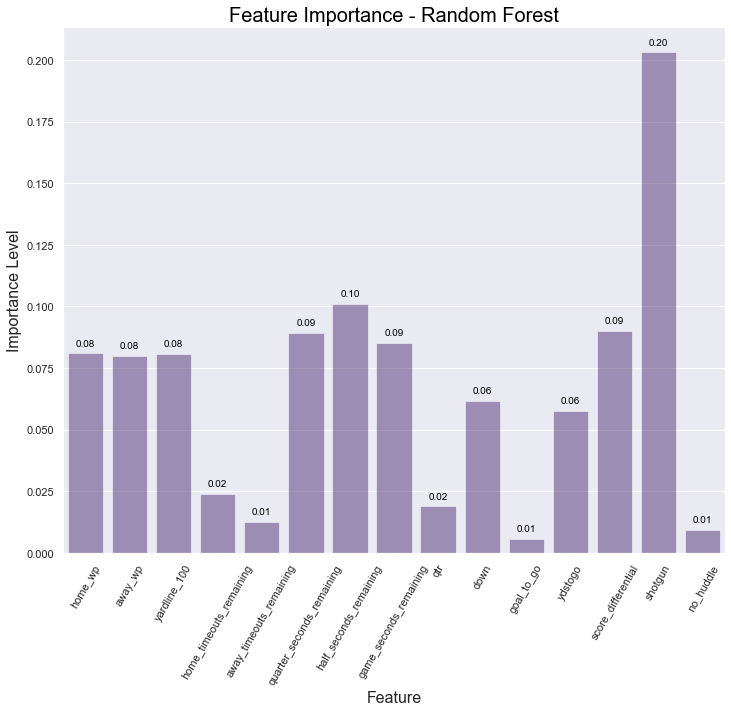

In [72]:
plt.figure(figsize=(10,10))
splot = sns.barplot(X_train.columns, importances, color='#4F2683', alpha=.5)
plt.xticks(rotation=60)
plt.title('Feature Importance - Random Forest', fontsize=20)
plt.xlabel('Feature', fontsize=16)
plt.xticks()
plt.tight_layout()
plt.ylabel('Importance Level', fontsize=16)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
                   


In [73]:
X_train.columns

Index(['home_wp', 'away_wp', 'yardline_100', 'home_timeouts_remaining',
       'away_timeouts_remaining', 'quarter_seconds_remaining',
       'half_seconds_remaining', 'game_seconds_remaining', 'qtr', 'down',
       'goal_to_go', 'ydstogo', 'score_differential', 'shotgun', 'no_huddle'],
      dtype='object')

In [74]:
feat_imort = pd.DataFrame(X_train.columns).T

In [75]:
feat_imort

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle


In [76]:
confusion_matrix(y_test, y_pred)

array([[ 58,  32],
       [ 43, 166]])

In [77]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 58  32]
 [ 43 166]]
              precision    recall  f1-score   support

           0       0.57      0.64      0.61        90
           1       0.84      0.79      0.82       209

    accuracy                           0.75       299
   macro avg       0.71      0.72      0.71       299
weighted avg       0.76      0.75      0.75       299

0.7491638795986622


# XG BOOST

In [78]:
# https://www.kdnuggets.com/2017/03/simple-xgboost-tutorial-iris-dataset.html

In [79]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [80]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [82]:
accuracy

0.7224080267558528

In [83]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [84]:
# xgb.__version__

In [85]:
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [50, 10]
# plt.show()

In [86]:
# data_dmatrix = xgb.DMatrix(data=X,label=y)

In [87]:
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [88]:
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [5, 5]
# plt.show()

In [89]:
final_df.head()

,home_wp,away_wp,yardline_100,home_timeouts_remaining,away_timeouts_remaining,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,goal_to_go,ydstogo,score_differential,shotgun,no_huddle,play_type
Unnamed: 0,,,,,,,,,,,,,,,,
943,-0.145385,0.145385,0.960025,0.611376,0.558939,1.797918,1.761081,1.784537,-1.392196,-0.953008,-0.220048,0.373542,0.195221,0.803916,-0.270695,1
944,-0.009991,0.009991,0.581704,0.611376,0.558939,1.652684,1.690852,1.748040,-1.392196,0.226118,-0.220048,-1.913638,0.195221,-1.243911,-0.270695,0
945,-0.009991,0.009991,0.497633,0.611376,0.558939,1.507450,1.620623,1.711542,-1.392196,-0.953008,-0.220048,0.373542,0.195221,-1.243911,-0.270695,1
946,0.091554,-0.091554,-0.006795,0.611376,0.558939,1.377111,1.557597,1.678788,-1.392196,-0.953008,-0.220048,0.373542,0.195221,-1.243911,-0.270695,0
947,0.023857,-0.023857,-0.048831,0.611376,0.558939,1.239325,1.490970,1.644162,-1.392196,0.226118,-0.220048,0.119411,0.195221,0.803916,-0.270695,0


In [90]:
shotgun_df = final_df[(final_df['shotgun'] > 0)]

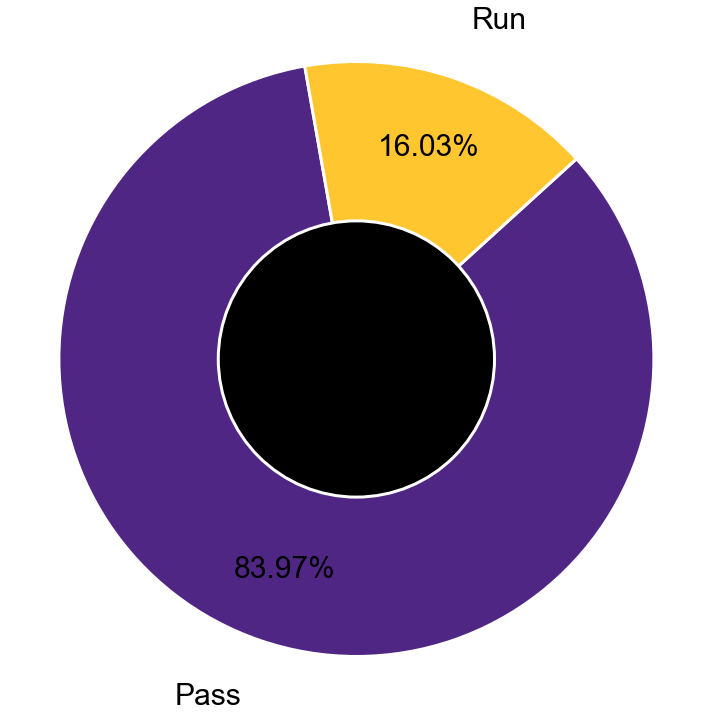

In [91]:
plt.figure(figsize=(10,10))
plt.pie(shotgun_df['play_type'].value_counts(), labels=['Pass', 'Run'], colors=['#4F2683', '#FFC62F'], autopct='%.2f%%', textprops={'fontsize': 30}, wedgeprops={'linewidth': 3}, labeldistance=1.2, pctdistance=.75, radius=1.4, startangle=100)
centre_circle = plt.Circle((0,0),0.65,color='white', fc='black',linewidth=3)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.rcParams['text.color'] = 'white'
plt.axis('equal')
plt.tight_layout()
plt.show()

In [92]:
def plot_confusion(y_true, y_hat):
    labels = [0, 1]
    cm = confusion_matrix(y_true, y_hat, labels)
    print(cm)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion Matrix', fontsize=18)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.show()

[[ 57  33]
 [ 50 159]]


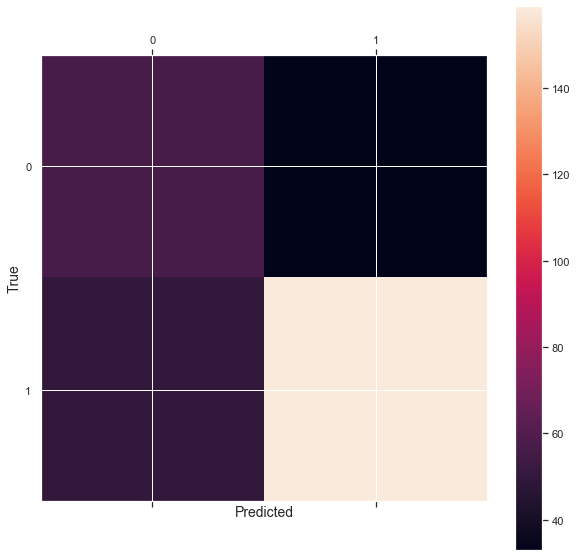

In [93]:
plot_confusion(y_test, y_pred)

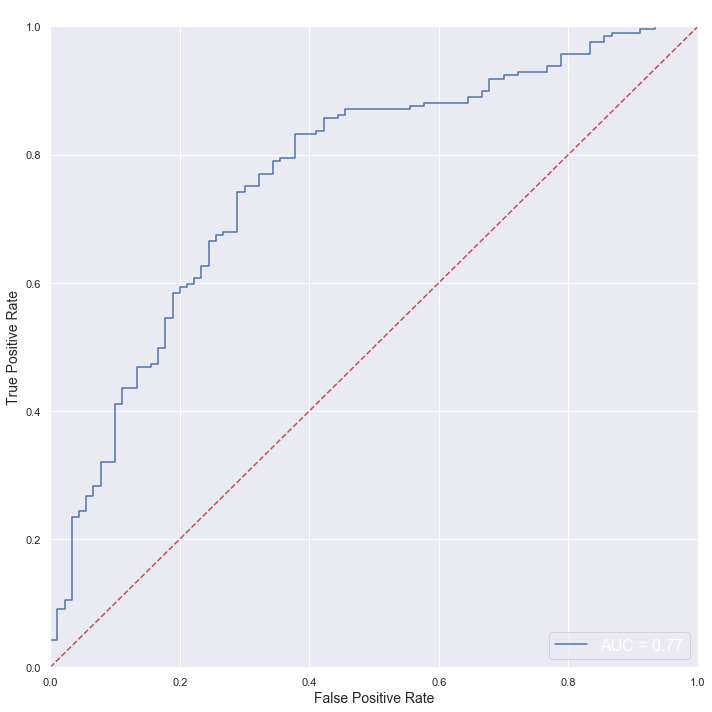

In [94]:
fpr, tpr, threshold = roc_curve(y_test, y_proba[:,1])
roc_auc = roc_auc_score(y_test, y_proba[:,1])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize=16)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=14)
plt.tight_layout()
plt.rcParams['text.color'] = 'black'
plt.show()